# User's Guide, Chapter 8: Installing MusicXML Readers and File Formats (1)

Music21 can import and export many different musical data formats, including MusicXML and MIDI.

Pieces in many of these formats are distributed with music21 as part of the corpus module (see
:ref:`moduleCorpus`); look at :ref:`referenceCorpus` to see them all.

In general, to load a file from disk, call
:func:`music21.converter.parse`, which can handle importing all supported formats. (For
complete documentation on file and data formats, see :ref:`moduleConverter`.) If you want to convert a file from the corpus just use :func:`music21.corpus.parse`:

In [1]:
from music21 import *

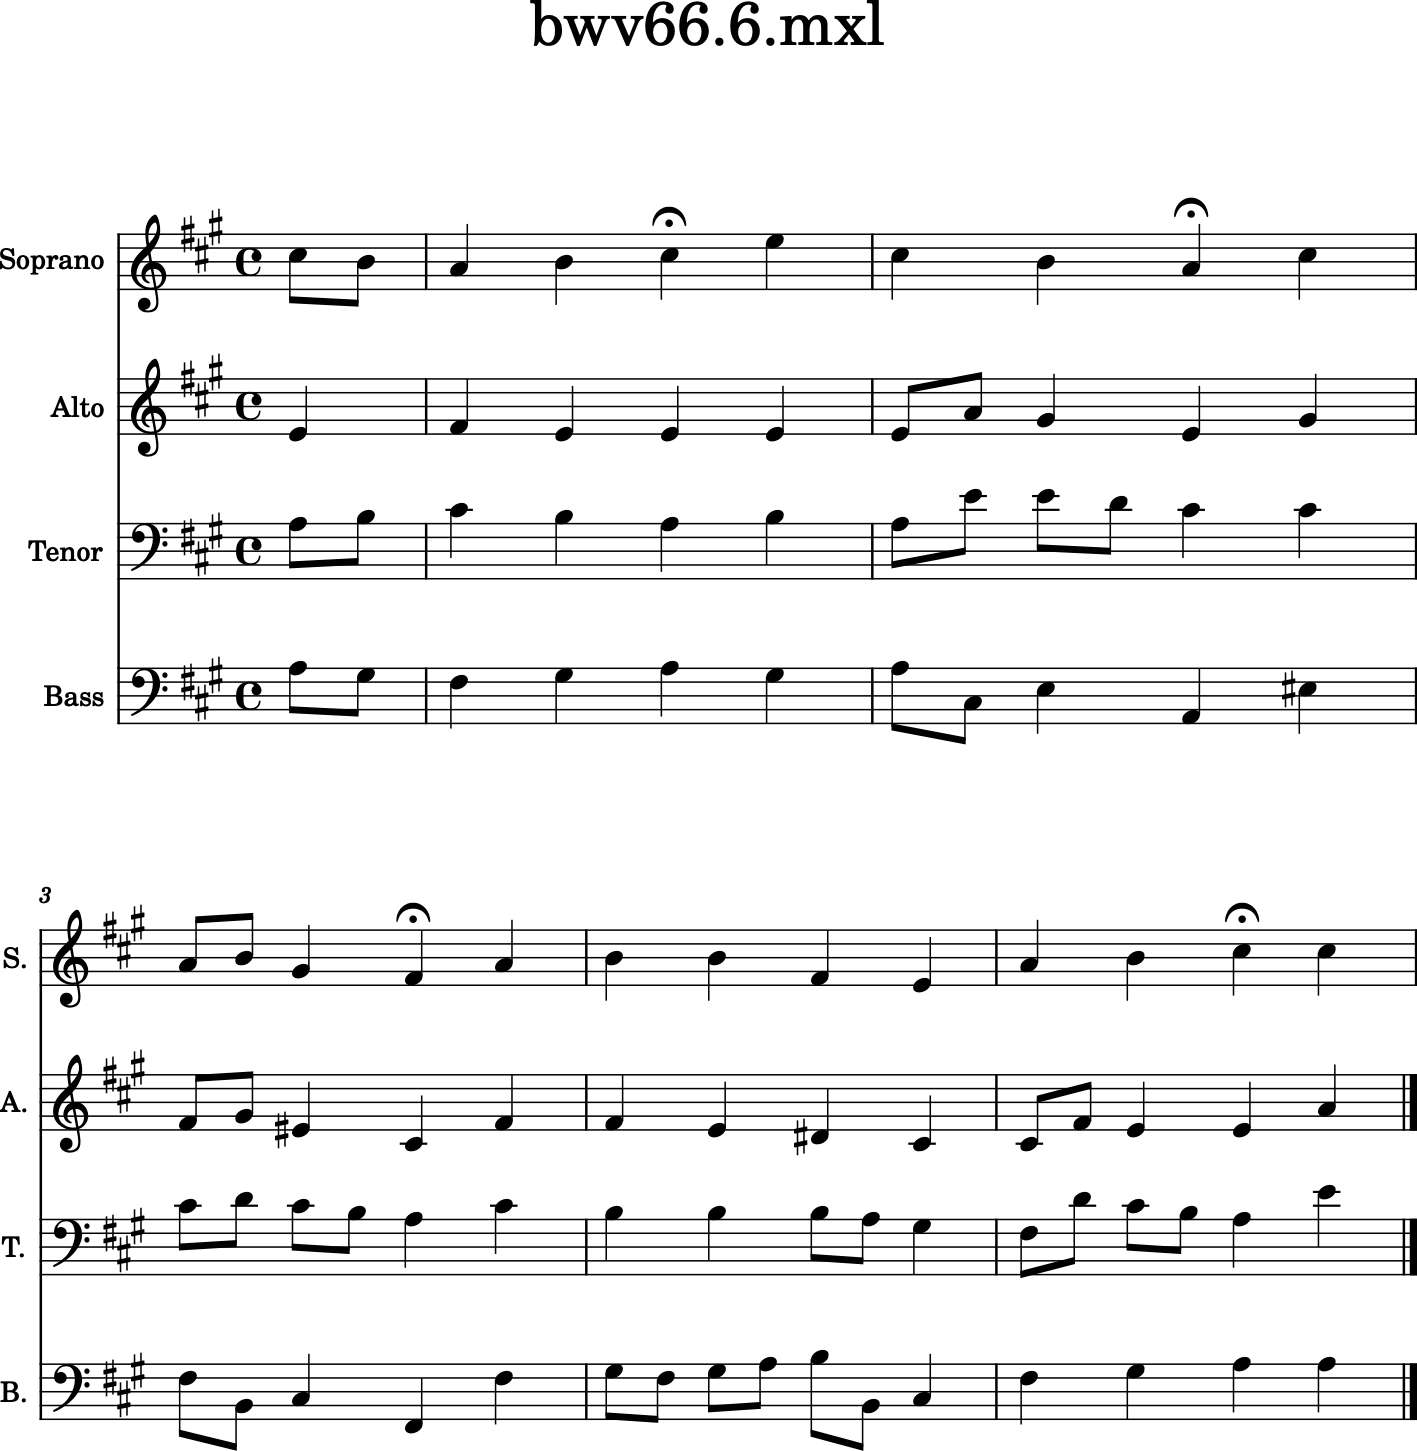

In [2]:
b = corpus.parse('bach/bwv66.6')
b = b.measures(0, 5) #_DOCS_HIDE
b.show() # I've altered this so it's much shorter than it should be...

Okay, so say you're having some problems seeing things.  The first things to ask are:

* Do you have Finale, Sibelius, or MuseScore installed?
* Will you go to https://musescore.org/en and get a Free copy?

Once you have one of these three (or others such as Dorico) installed, we can move on.  (It *is* possible to use `music21` with Lilypond alone, but that's much harder to get configured properly, so please try this first)

Run this command (after the `from music21 import *`):

In [3]:
#_DOCS_SHOW configure.run()

You can say "no" to everything that is "Yes/No", but make sure that it is finding your copy of MuseScore, Finale, or Sibelius.

## Parsing Files in General

You can parse a file on your hard drive by calling :func:`music21.converter.parse`.  This returns a :class:`~music21.stream.Score` usually, though sometimes :class:`~music21.stream.Part` (for a format that only handles single parts) or :class:`~music21.stream.Opus` (for multiple scores bound together) comes back instead.  You won't do much with that unless you assign it to a variable, such as `c`:

In [4]:
#_DOCS_SHOW c = converter.parse('/Users/cuthbert/Desktop/myXML.xml')

If you're on a PC, one of the things to notice is that you can use forward slashes, as in:

In [5]:
#_DOCS_SHOW c = converter.parse('C:/Users/cuthbert/Desktop/myXML.xml')

Or you can use backslashes, as long as you put an `r` before the quote before the file name:

In [6]:
#_DOCS_SHOW c = converter.parse(r'C:\Users\cuthbert\Desktop\myXML.xml')

If you're in the directory of the file, you can just use the local filename (for instance if you start in `/Users/cuthbert/` you could just use `'Desktop/myXML.xml'`.

If the file you want is on the web, we can give a URL to the :func:`music21.converter.parse`
function that points to the desired file. Assuming proper system configuration
(which we will get to further in :ref:`Chapter 24 <usersGuide_24_environment>`), the file will be downloaded and parsed.

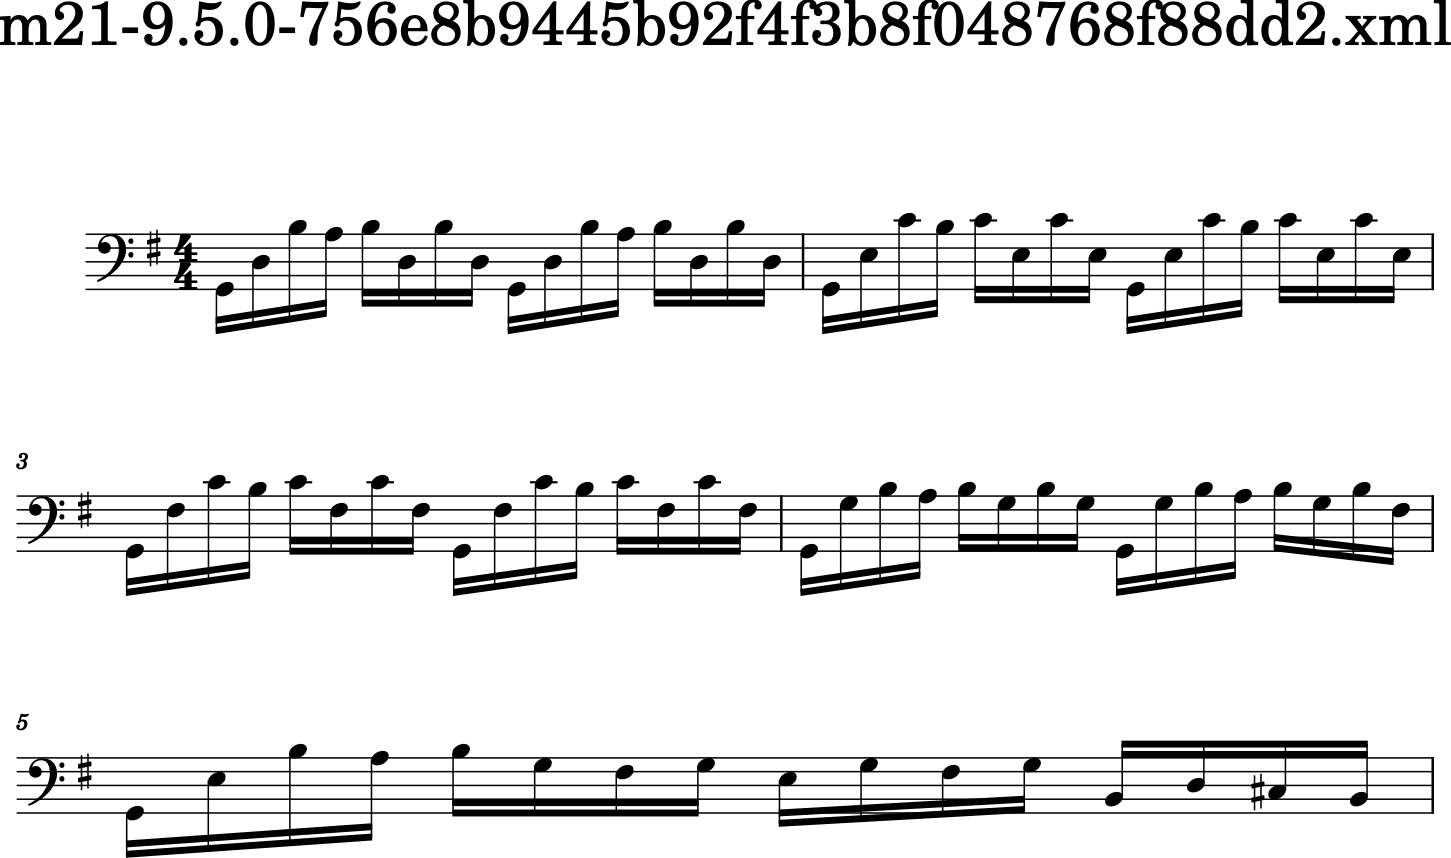

In [7]:
url = 'https://kern.humdrum.org/cgi-bin/ksdata?l=cc/bach/cello&file=bwv1007-01.krn&f=xml'
sAlt = converter.parse(url)
sAlt.measures(1, 5).show() # show first 5 measures

Usually, the file format can be guessed from the filename, but if the filename does not have a suffix *(as sometimes happens on macOS!)* or the URL has the wrong suffix, you can give a `format="FORMAT"` parameter to the file:

In [8]:
#_DOCS_SHOW c = converter.parse('/Users/cuthbert/Desktop/myXML', format='musicxml')

One of the things you'll notice over time is that once you parse a file into `music21` once, the next time you parse it it'll be between 2 and 5 times faster.  That's because we save an optimized version of the file the first time you create a file, and subsequent times you open it it will check to see if the original file has changed, and if it hasn't, it will read the optimized version instead.

For most people, this will work 100% of the time.  But if you've done something sneaky (like changed the file without changing its modification time) or you've changed the format of the `music21` parser, or if something's not right, or if you just want to do things slower, you can put a `forceSource=True` keyword into the `parse` format.

In [9]:
#_DOCS_SHOW c = converter.parse('/Users/cuthbert/Desktop/myXML.xml', forceSource=True)

By the way...if you've read any really old `music21` publications, you might see `parseWork` mentioned instead of `parse`.  It's the same thing, so anywhere you see `parseWork`, type `parse` instead.

## File types available to `music21`

`Music21` can read and write a lot of different file formats.  Some of them are pretty obscure.  Some of them are world standards.  The `converter` module's capital-c-`Converter` object can give a list of some of them.  Each tool to work with one format is called a `subConverter`.  Here are the formats that `music21` can read:

In [10]:
converter.Converter().subConvertersList('input')

[music21.converter.subConverters.ConverterABC,
 music21.converter.subConverters.ConverterCapella,
 music21.converter.subConverters.ConverterClercqTemperley,
 music21.converter.subConverters.ConverterHumdrum,
 music21.converter.subConverters.ConverterMEI,
 music21.converter.subConverters.ConverterMidi,
 music21.converter.subConverters.ConverterMuseData,
 music21.converter.subConverters.ConverterMusicXML,
 music21.converter.subConverters.ConverterNoteworthy,
 music21.converter.subConverters.ConverterNoteworthyBinary,
 music21.converter.subConverters.ConverterRomanText,
 music21.converter.subConverters.ConverterScala,
 music21.converter.subConverters.ConverterTinyNotation,
 music21.converter.subConverters.ConverterVolpiano]

And the formats that it can write:

In [11]:
converter.Converter().subConvertersList('output')

[music21.converter.subConverters.ConverterBraille,
 music21.converter.subConverters.ConverterLilypond,
 music21.converter.subConverters.ConverterMidi,
 music21.converter.subConverters.ConverterMusicXML,
 music21.converter.subConverters.ConverterRomanText,
 music21.converter.subConverters.ConverterScala,
 music21.converter.subConverters.ConverterText,
 music21.converter.subConverters.ConverterTextLine,
 music21.converter.subConverters.ConverterVexflow,
 music21.converter.subConverters.ConverterVolpiano]

To output a file, either call `.show("format")` on the stream (where format can be `musicxml`, `braille`, `midi`, etc.) or to keep the file on disk, use `.write("format", "filename")`.

Some of the available formats will be listed below; the most important ones for now are the output formats (since music21 will figure out inputs automatically).  They are `braille`, `lilypond`, `midi`, `musicxml`, `scala`, `text`, and `vexflow`.

Some formats have sub-formats; for instance, both `musicxml` and `lilypond` have a `.png` subformat which converts directly to a `.png` file.  To use that, call `.show("musicxml.png")`.

Some formats have abbreviations also, so `musicxml` is also `xml`, `lilypond` is `lily`, and (for ease of typing), `text` is `t`.

## Getting and working with MusicXML Files

A whole bunch of MusicXML files can be found at the following URLs.

* https://musescore.com/

* https://www.gutenberg.org/

* https://imslp.org/  (hidden amongst the many PDFs)

MusicXML files sometimes have the extension `.xml` or '.musicxml' or `.mxl`.  The last is the suffix for a compressed MusicXML file; it loads in the same manner.

The format for musicxml, is, of course, `musicxml`.

> **_SECURITY WARNING:_** MusicXML, like all XML formats, has certain security issues which are built into the Python ElementTree library.  If you are parsing MusicXML files from an untrusted source (like the Internet or from a user upload in the case of using `music21` in a server environment), we strongly urge the use of additional security libraries, such as [defusedxml](https://pypi.org/project/defusedxml/).  To have `music21` use `defusedxml` by default, call `import defusedxml; defusedxml.defuse_stdlib()` before importing music21.

## Getting and working with Humdrum Files

Humdrum is a file format developed by David Huron at Ohio State University which is great at encoding works for computational analysis.  The Humdrum format includes many subformats ("spine classes") of which `music21` supports the general class, the `kern` format, and the `dynam` dynamics format.

Parsing Humdrum files is exactly as parsing other data formats. Simply call the music21.converter.parse() function on the desired file path or URL.

In [12]:
sBach = converter.parse('https://kern.humdrum.org/cgi-bin/ksdata?' +
                        'l=users/craig/classical/bach/cello&file=bwv1007-01.krn&f=kern')

Over one hundred thousand Kern files can be found at the following URL.

https://kern.humdrum.org/

## Getting and working with ABC Files

ABC is a text-based format that can encode lots of musical types, but is especially great for monophonic songs, such as folk songs. If you're in the folk song world, you'll love working with ABC.

Parsing ABC files is exactly as parsing other data formats. Simply call the
:func:`music21.converter.parse` function on the desired file path or URL.

In [13]:
#_DOCS_SHOW o = converter.parse('/Users/cuthbert/Documents/Music21/praludium.abc')

Large collections of ABC are available from numerous on-line repositories. The
following links are just a few of the many resources available.

https://abcnotation.com

http://www.serpentpublications.org/drupal7/

### ABC Opus files

Note that many ABC files define more than one complete musical work. If an ABC
file defines more than one work, an :class:`~music21.stream.Opus` object is
returned. Opus objects, a Stream subclass, provide convenience methods for
accessing multiple Score objects.

You can get a whole bunch of pieces together just by parsing the file.  For instance, here's an Opus:

In [15]:
o = corpus.parse('josquin/ovenusbant')
o

<music21.stream.Opus josquin/oVenusBant.abc>

Reference work numbers (e.g., the "X:" metadata tag in ABC) are stored in
:class:`~music21.metadata.Metadata` objects in each contained Score. Access to
these numbers from the Opus is available with the
:meth:`music21.stream.Opus.getNumbers` method. Additionally, the
:class:`~music21.stream.Score` object can be directly obtained with the
:meth:`~music21.stream.Opus.getScoreByNumber` method.

In [16]:
o = corpus.parse('josquin/ovenusbant')
o.getNumbers()

['1', '2', '3']

In [17]:
s = o.getScoreByNumber(2)
s.metadata.title

'O Venus bant'

Direct access to Score objects contained in an Opus by title is available with
the :meth:`~music21.stream.Opus.getScoreByTitle` method.

In [18]:
o = corpus.parse('essenFolksong/erk5')
s = o.getScoreByTitle('Vrienden, kommt alle gaere')
s

<music21.stream.Score 0x119d22d50>

In [19]:
s.metadata.title

'Vrienden, kommt alle gaere'

Some ABC files, such as those in `corpus/essenFolksong` have hundreds or thousands of files.  The way we've been doing things before is to parse all of them and then select the one we want.  If you know the number of the file you want, however, you can pass to `converter.parse` or `corpus.parse` a `number=X` attribute to get just that one. It will return a `Score` object

In [20]:
s = corpus.parse('essenFolksong/erk5', number=2)
s

<music21.stream.Score essenFolksong/erk5.abc>

### ABC single-part Opus files

In some cases an ABC file may define individual parts each as a separate score, sort of like a Renaissance partbook.
When parsed, these parts can be combined from the Opus into a single Score with
the :meth:`music21.stream.Opus.mergeScores` method.

For instance, here is Josquin's "Mille Regretz" (spelled with an s) stored as four individual parts each as its own score:

In [21]:
o = corpus.parse('josquin/milleRegrets')
len(o.scores)

4

In [22]:
len(o.scores[0].parts)

1

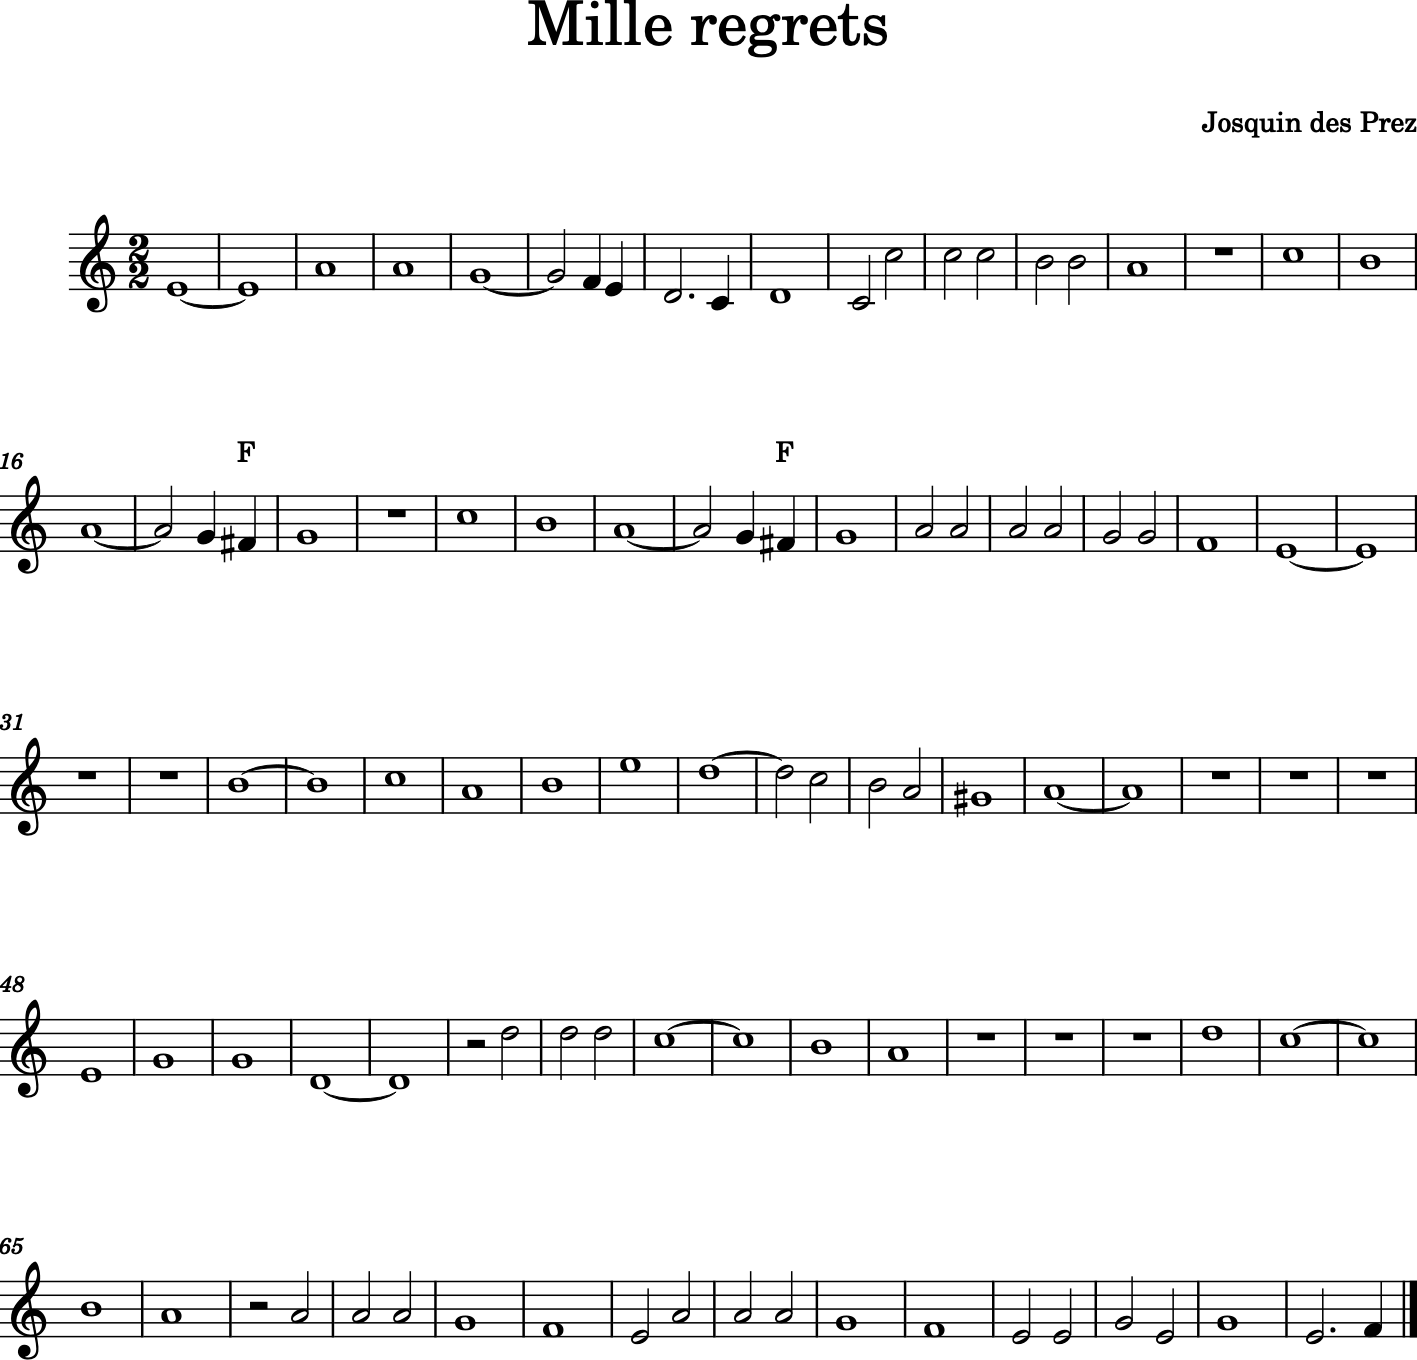

In [27]:
o.scores[0].show()

So, that's not too helpful.  We can run `mergeScores` to bring them into a single score with four parts.

In [24]:
s = o.mergeScores()
s.metadata.title

'Mille regrets'

In [25]:
len(s.parts)

4

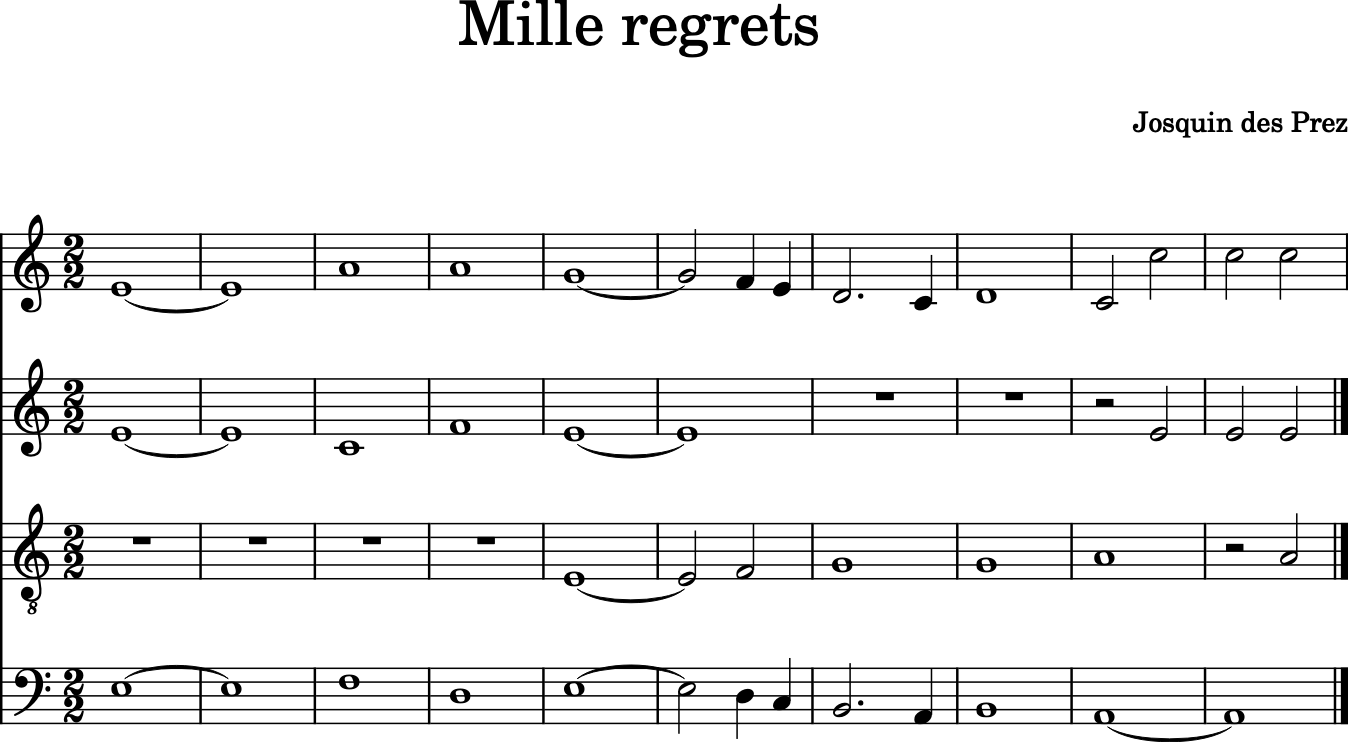

In [26]:
s.measures(1, 10).show()

## Parsing Musedata Files

Musedata is a format devised by Walter Hewlett (yes, of HP lineage) in the 1980s that is highly memory efficient. Probably not the best format for modern computers, but there's a huge collection of Musedata files out on the net of many standard repertory pieces.

Both stage 1 (limited encoding) and stage 2 (rich encoding) Musedata file formats are supported by Music21.
Multi-part Musedata (stage 2) files, zipped archives, and directories
containing individual files for each part (stage 1 or stage 2) can be imported
with the :func:`music21.converter.parse` function on the desired file path or
URL.

Note that access restrictions prevent demonstrating Musedata conversion. Downloading or using Musedata files requires sending a written access agreement to the owners.

## Parsing MIDI Files

MIDI input and output is handled in the same way as other formats. Simply call the
:func:`music21.converter.parse` function on the desired file path or URL.

Remember (or learn if you haven't yet), that MIDI has no information about enharmonic spelling (C# and Db are the same), and that detecting the lengths of notes can be difficult.  `Music21` does very well with MIDI files that were created in notation software or sequencing software, but has a harder time handling MIDI files created by recording live input.  For those files, we suggest converting the MIDI files in software such as Finale that has a more sophisticated MIDI to MusicXML conversion routine.

## Conclusion

One of `music21`'s core strengths is the number of different file formats it handles. Some people who don't use `music21` for anything else use it as a format converter. We're happy about that, but think, hey, there's a lot more that you can do with it than that.  Let's move on in the next chapter to one of the tools that `music21` has for analysis that almost nothing else out there has: :ref:`Chapter 9: Chordify <usersGuide_09_chordify>` which reduces scores to chordal collections.
